# Plotting and Animating Simulations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pandas as pd
%matplotlib notebook
from IPython.display import HTML

plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams.update({'font.size': 18})

## Plotting Start and Final Positions

In [2]:
pos_file = './Results/positions.dat'

pos_data = pd.read_table(pos_file,sep=' ',header=None)

In [3]:
pos_start = pos_data.iloc[0].to_numpy()[:-1]
pos_end = pos_data.iloc[-1].to_numpy()[:-1]

<IPython.core.display.Javascript object>


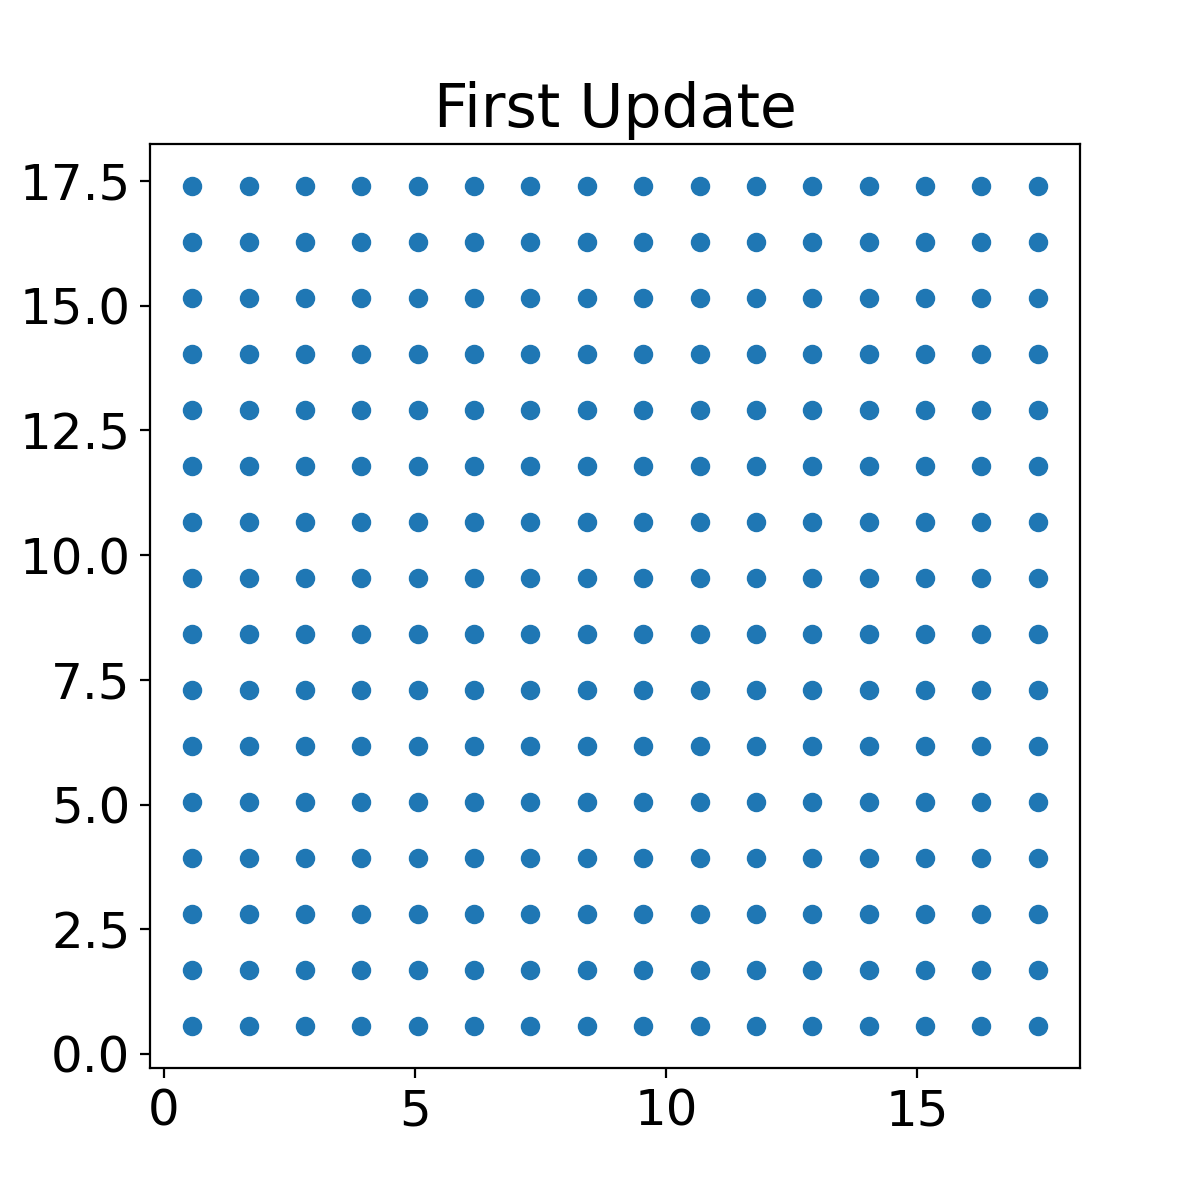

<IPython.core.display.Javascript object>


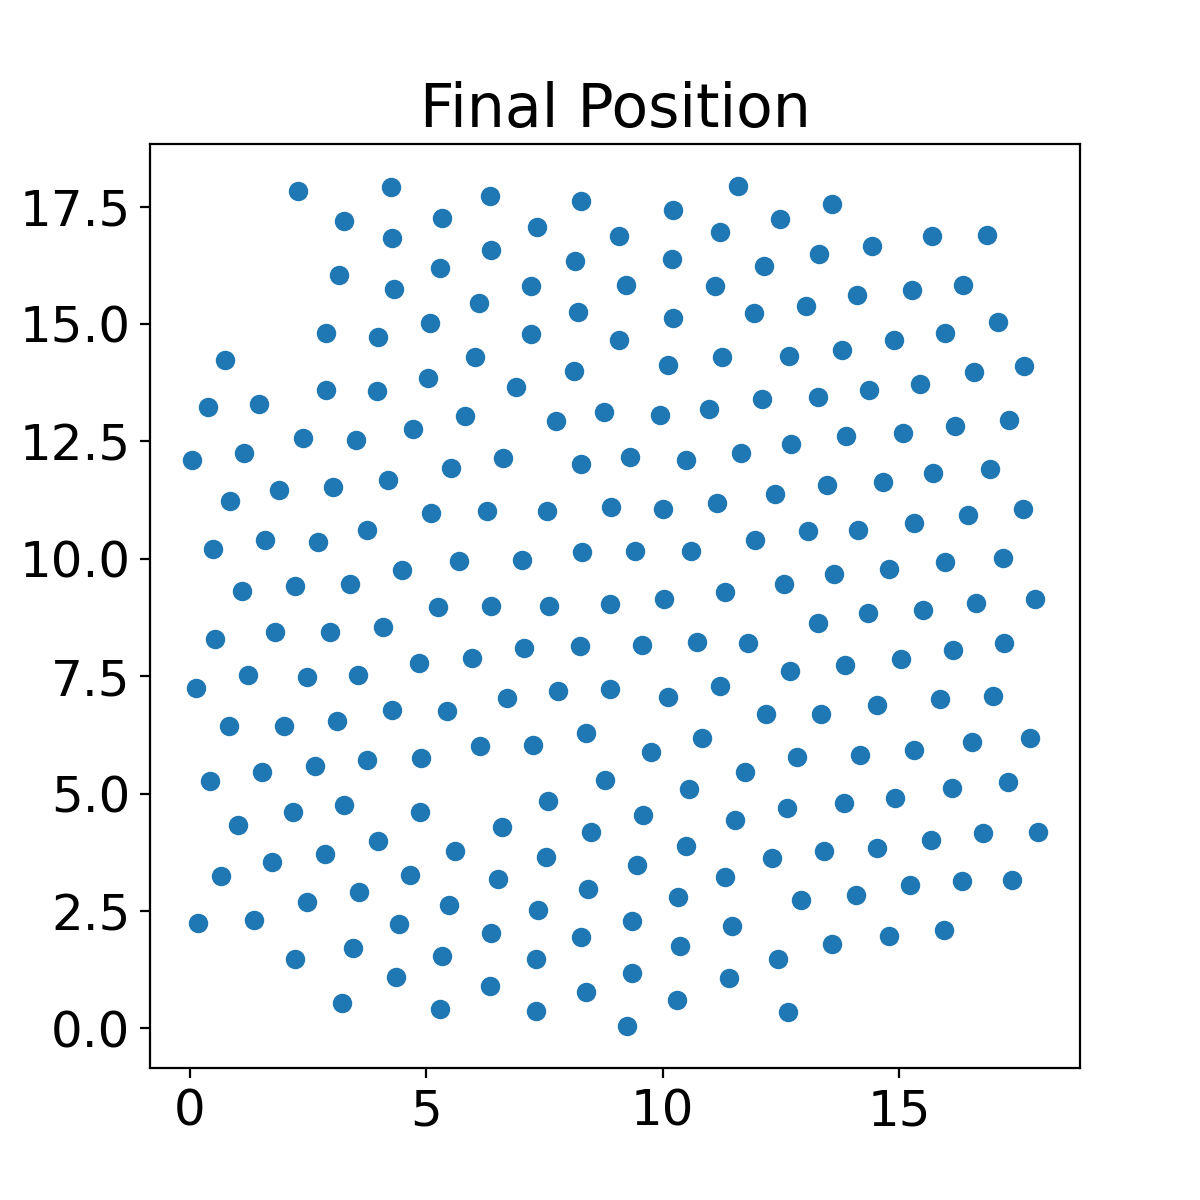

In [4]:
fig1, ax1 = plt.subplots(1)
fig2, ax2 = plt.subplots(1)

xstart = pos_start[::2]
ystart = pos_start[1::2]

xend = pos_end[::2]
yend = pos_end[1::2]

ax1.scatter(xstart,ystart)
ax2.scatter(xend,yend)

ax1.set_title('First Update')
ax2.set_title('Final Position')
plt.show()

## Animation of Trajectories

<IPython.core.display.Javascript object>


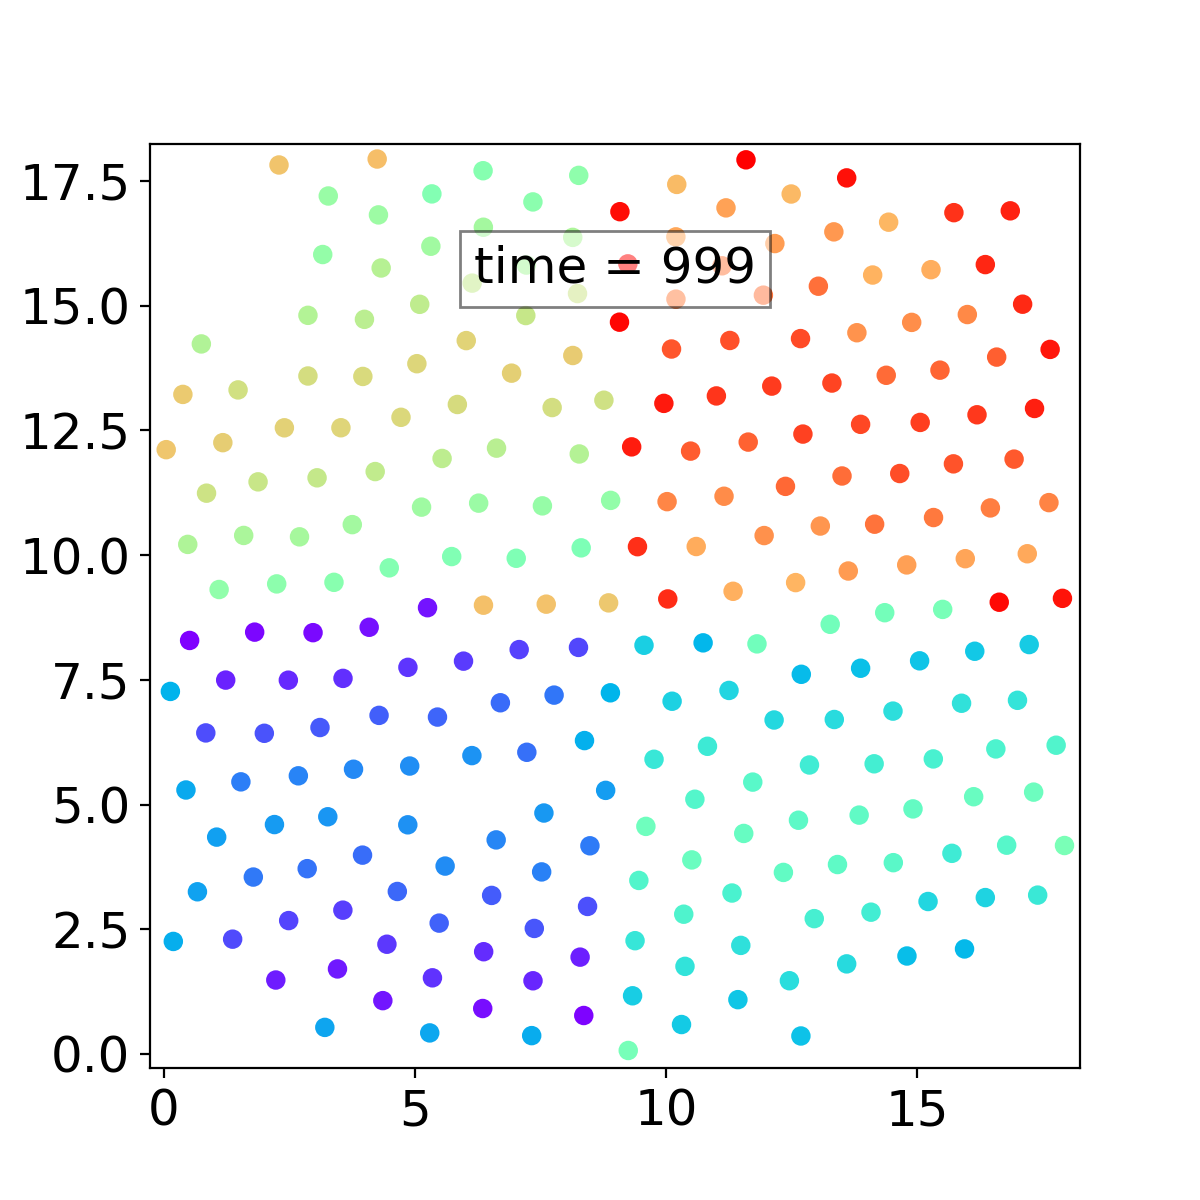

In [5]:
figanim, axanim = plt.subplots()
colors = plt.cm.rainbow(np.linspace(0, 1, 256 ))
scat = axanim.scatter(xstart, ystart, c=colors)
time_text = figanim.text(0.5,0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=axanim.transAxes, ha="center")
def animate(i):
    pos_i = pos_data.iloc[i*500].to_numpy()[:-1]
    x_i = pos_i[::2]
    y_i = pos_i[1::2]
    scat.set_offsets(np.c_[x_i, y_i])
    time_text.set_text("time = "+str(i))
    return scat, time_text,

a1 = animation.FuncAnimation(figanim, animate, frames = len(pos_data), repeat=True, interval = 1)
plt.draw()
plt.show()

## Energy Evolution

In [6]:
energy_file = './Results/energy.dat'
energy_data = pd.read_table(energy_file,sep=' ',header=None)

In [7]:
k_energy_traj = energy_data[0]
p_energy_traj = energy_data[1]
t0 = 0
tf = 50
n = len(k_energy_traj)
dt = (tf-t0)/n
times = np.linspace(0,50,n)
k_energy_traj = k_energy_traj[int(0.2*n):]
p_energy_traj = p_energy_traj[int(0.2*n):]
times = times[int(0.2*n):]

<IPython.core.display.Javascript object>


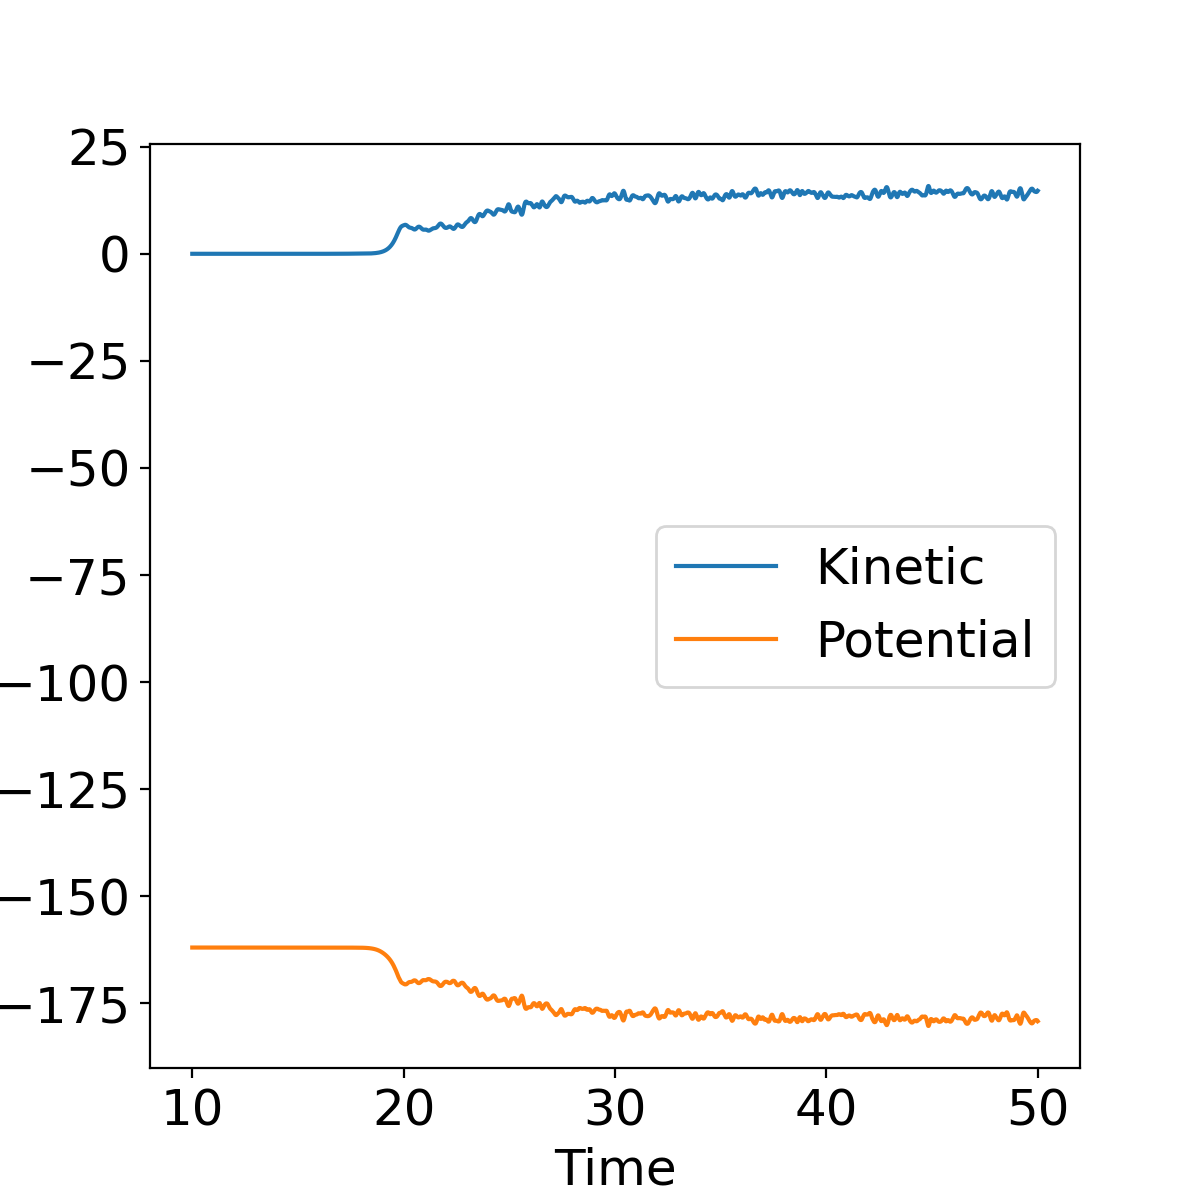

In [8]:
fig3 = plt.figure()
plt.plot(times, p_energy_traj, label="Kinetic")
plt.plot(times, k_energy_traj, label="Potential")
plt.xlabel('Time')
plt.ylabel('Energies')
plt.legend()
plt.show()